In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/ABHISHJA/Downloads/spaceship dataset/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [2]:
df = data.copy()

In [3]:
df = df.drop(['Name','PassengerId'],axis=1)

In [4]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

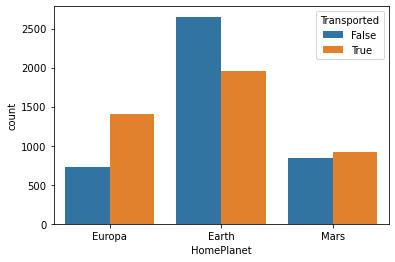

In [7]:
sns.countplot(x='HomePlanet', data=df, hue='Transported')

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

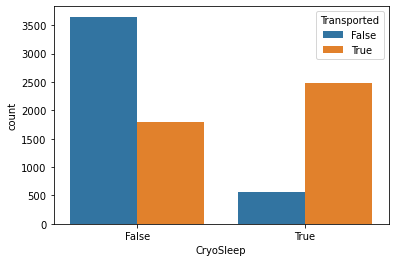

In [8]:
sns.countplot(x='CryoSleep', data=df, hue='Transported')

from scipy.stats import chi2_contingency
data = df[['CryoSleep','Transported']]

In [9]:
df['Cabin'] = df['Cabin'].fillna('missing')

In [10]:
df['deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])

In [11]:
df['side'] = df['Cabin'].apply(lambda x: 'missing' if len(x.split('/'))<3 else x.split('/')[2])

In [12]:
df = df.drop('Cabin', axis=1)

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O' 
                        and feature not in ['Transported','PassengerId']]

for feature,i in zip(categorical_features, range(len(categorical_features))):
    df[feature] = df[feature].fillna(f'missing{i}')



In [14]:
categorical_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side']

In [15]:
for feature in categorical_features:
    df[feature] = df[feature].fillna('missing')

In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O' and feature not in 'Transported']

In [17]:
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

for feature in categorical_features:
    dummies = pd.get_dummies(df[feature], drop_first=True)
    df = df.drop(feature, axis=1)
    df = pd.concat([df,dummies], axis=1)

In [18]:
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [19]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [20]:
X = df.drop('Transported',axis=1)
y = df['Transported']

In [21]:
X = pd.get_dummies(X)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params = {'max_features': [3,5,10,20,24],
          'max_depth': [5,10,20,50,80,100]}

rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=5).fit(X_train_scaled,y_train)


In [44]:
y_pred = rf_grid.best_estimator_.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8160919540229885


In [48]:
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
clf=XGBClassifier()

params={
    'learning_rate'      : [0.05,0.1,0.25,0.3], # 4
    'max_depth'          : [5,15,30,50],         # 4
    'min_child_weight'   : [3,7],                    # 2
    'gamma'              : [0.1,0.2,0.4],        # 3
              
}
xgb_grid = GridSearchCV(clf,param_grid=params,scoring='accuracy',cv=5).fit(X_train_scaled,y_train)

In [51]:
y_pred = xgb_grid.best_estimator_.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))

0.8149425287356322


In [62]:
xgb_pipeline = make_pipeline(scaler, xgb_grid.best_estimator_)

In [63]:
xgb_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.4, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=7,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
      

In [54]:
test_data = pd.read_csv('C:/Users/ABHISHJA/Downloads/spaceship dataset/test.csv')
test_data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [419]:
categorical_features

['HomePlanet', 'Destination', 'deck']

In [55]:
def preprocess(data):
    data['Cabin'] = data['Cabin'].fillna('missing')
    data['deck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
    data['side'] = data['Cabin'].apply(lambda x: 'missing' if len(x.split('/'))<3 else x.split('/')[2])    
    data = data.drop(['Cabin','Name','PassengerId'],axis=1)
    for feature in categorical_features:
        data[feature] = data[feature].fillna('missing')
   
    data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())
        
    return data

In [56]:
preprocess_test_data = preprocess(test_data)

In [58]:
final_test_data = pd.get_dummies(preprocess_test_data)

In [64]:
y_pred_final = xgb_pipeline.predict(final_test_data)

In [65]:
y_pred_final

array([1, 0, 1, ..., 1, 1, 1])

In [76]:
result = []
for i in y_pred_final:
    result.append(bool(i))

In [91]:
import numpy as np
submission = pd.DataFrame(test_data['PassengerId'])

In [92]:
submission = pd.concat([submission, pd.DataFrame(result)], axis=1)

In [94]:
submission.columns = ['PassengerID', 'Transported']

In [97]:
submission.to_csv('SpaceShip(Kaggle).csv', index=False)

In [99]:
rf_pipeline = make_pipeline(scaler, rf_grid.best_estimator_)

y_pred_rf = rf_pipeline.predict(final_test_data)
result = []
for i in y_pred_rf:
    result.append(bool(i))
    
submission = pd.DataFrame(test_data['PassengerId'])
submission = pd.concat([submission, pd.DataFrame(result)], axis=1)
submission.columns = ['PassengerID', 'Transported']
submission.to_csv('SpaceShip(Kaggle).csv', index=False)